# Time Analysis

This examples show how fast MiniSom GPU can be when employing CPU and GPU for different topologies.

First, let's load a dataset (in this case the famous Iris dataset) and apply normalization:

In [1]:
from time import time
from sklearn.datasets import load_iris
from minisom_gpu.som import MiniSom
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data, _ = load_iris(return_X_y=True)
num_runs = 20
device = 'cuda'

In [2]:

with torch.device(device):
    X = torch.tensor(np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data), dtype=torch.float32)
    elapsed_time = torch.zeros(num_runs)

    for i in range(num_runs):
        som = MiniSom(7, 7, 4, sigma=3, learning_rate=0.5, neighborhood_function='triangle', random_seed=0, device=device)
        start_time = time()
        som.pca_weights_init(X)
        som.train_random(X, 5000, verbose=False)
        elapsed_time[i] = time() - start_time

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

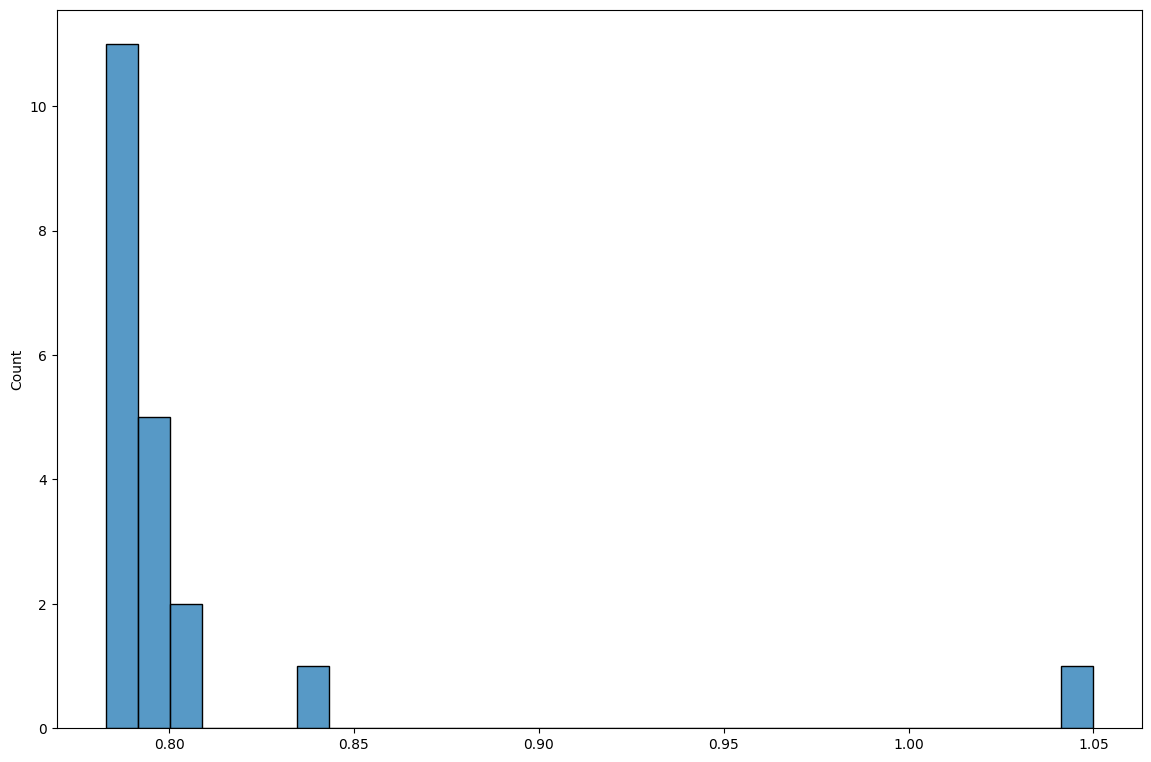

In [3]:


plt.figure(figsize=(14, 14/1.5))
sns.histplot(elapsed_time.cpu().numpy())